In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import scikit_posthocs as sp
import matplotlib.pyplot as plt
import sys
import os
from scipy.stats import friedmanchisquare

sys.path.append('..')

In [2]:
folders = [
    ('SM_1H_K2',11,"CSNN"),
    #'SM_1H_K3',
    #'SM_1H_K4',
    #'SM_1H_K5',
    ('MM_1H_K2',15,"CSNN"),
    #'MM_1H_K3',
    #'MM_1H_K4',
    #'MM_1H_K5',
    ('LM_1H_K2',23,"CSNN"),
    #'LM_1H_K3',
    #'LM_1H_K4',
    #'LM_1H_K5',
    #'SM_2H_K2',
    ('SM_2H_K3',16,"CSNN"),
    #'SM_2H_K4',
    ('MM_2H_K2',9,"CSNN"),
    #'MM_2H_K3',
    #'MM_2H_K4',
    #'LM_2H_K2',
    ('LM_2H_K3',23,"CSNN"),
    #'LM_2H_K4',
    ('SM_3H_K2',21,"CSNN"),
    ('MM_3H_K2',22,"CSNN"),
    ('LM_3H_K2',10,"CSNN"),
    # FFSNN
    ("FFSNN_1H",22,"FFSNN"),
    ("FFSNN_2H",25,"FFSNN"),
    ("FFSNN_3H",21,"FFSNN"),
    # CNN
    ("CNN_1H",1,"CNN"),
    ("CNN_2H",1,"CNN"),
    ("CNN_3H",1,"CNN"),
    # LFNN
    ("FFNN_1H",1,"FFNN"),
    ("FFNN_2H",1,"FFNN"),
    ("FFNN_3H",1,"FFNN"),
]
dfs = []
for f, steps,type in folders:
    results_df = pd.read_csv(f'../results/{f}.csv')
    model = f.split('-')[0]
    results_df['model'] = model
    results_df['steps'] = steps
    results_df['type'] = type
    dfs.append(results_df)
    print(f'Loaded {f} – {len(results_df)} results')
df = pd.concat(dfs)[['model','dataset','trial','recall']]
df_datasets = {}
df_base = df[df['dataset']=='Base']
df_variant1 = df[df['dataset']=='Variant I']
df_variant2 = df[df['dataset']=='Variant II']
df_variant3 = df[df['dataset']=='Variant III']
df_variant4 = df[df['dataset']=='Variant IV']
df_variant5 = df[df['dataset']=='Variant V']
aux = df_base.pivot(columns='model', values='recall').reset_index(drop=True)
df_datasets['Base'] = aux
aux = df_variant1.pivot(columns='model', values='recall').reset_index(drop=True)
df_datasets['Variant I'] = aux
aux = df_variant2.pivot(columns='model', values='recall').reset_index(drop=True)
df_datasets['Variant II'] = aux
aux = df_variant3.pivot(columns='model', values='recall').reset_index(drop=True)
df_datasets['Variant III'] = aux
aux = df_variant4.pivot(columns='model', values='recall').reset_index(drop=True)
df_datasets['Variant IV'] = aux
aux = df_variant5.pivot(columns='model', values='recall').reset_index(drop=True)
df_datasets['Variant V'] = aux
df_datasets['Base']

Loaded SM_1H_K2 – 600 results
Loaded MM_1H_K2 – 600 results
Loaded LM_1H_K2 – 600 results
Loaded SM_2H_K3 – 600 results
Loaded MM_2H_K2 – 600 results
Loaded LM_2H_K3 – 600 results
Loaded SM_3H_K2 – 600 results
Loaded MM_3H_K2 – 600 results
Loaded LM_3H_K2 – 600 results
Loaded FFSNN_1H – 600 results
Loaded FFSNN_2H – 600 results
Loaded FFSNN_3H – 600 results
Loaded CNN_1H – 600 results
Loaded CNN_2H – 600 results
Loaded CNN_3H – 600 results
Loaded FFNN_1H – 600 results
Loaded FFNN_2H – 600 results
Loaded FFNN_3H – 600 results


model,CNN_1H,CNN_2H,CNN_3H,FFNN_1H,FFNN_2H,FFNN_3H,FFSNN_1H,FFSNN_2H,FFSNN_3H,LM_1H_K2,LM_2H_K3,LM_3H_K2,MM_1H_K2,MM_2H_K2,MM_3H_K2,SM_1H_K2,SM_2H_K3,SM_3H_K2
0,0.000000,0.0,0.858235,0.266505,0.000347,0.249479,0.086518,0.187283,0.059416,0.485754,0.457609,0.382210,0.393329,0.530924,0.399931,0.287352,0.592425,0.325921
1,0.000000,0.0,0.000000,0.602154,0.274496,0.000347,1.000000,0.147672,0.201876,0.515288,0.425990,0.503127,0.521195,0.453092,0.472203,0.282140,0.506254,0.455525
2,0.000000,0.0,0.000000,0.649409,0.000000,0.518068,0.445448,0.125087,0.338429,0.429465,0.387422,0.569493,0.041696,0.507644,0.447880,0.509382,0.611188,0.491661
3,0.000000,0.0,0.670605,0.229326,0.265115,0.384990,0.640723,0.105281,0.194580,0.449270,0.310285,0.610841,0.505212,0.539611,0.416956,0.645587,0.601807,0.349201
4,0.000000,0.0,0.000000,0.382557,0.377693,0.274844,0.999653,0.188673,0.152536,0.427380,0.492008,0.539611,0.423211,0.362752,0.429117,0.536831,0.509034,0.276233
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.000000,0.0,0.000000,0.774149,0.268937,0.349201,0.639680,0.217165,0.165045,0.570883,0.431202,0.562543,0.456567,0.443711,0.307158,0.509034,0.607714,0.467686
96,0.000000,0.0,0.879430,0.706393,0.244962,0.673037,1.000000,0.245309,0.120917,0.547950,0.383947,0.457609,0.431202,0.567408,0.457609,0.638290,0.633426,0.639680
97,0.211953,0.0,0.000000,0.466644,0.289090,0.309937,0.839124,0.092425,0.153579,0.336345,0.452050,0.379430,0.495830,0.536136,0.432592,0.508687,0.628214,0.499305
98,0.000000,0.0,0.000000,0.193537,0.309937,0.399931,0.562891,0.300556,0.110146,0.440584,0.444406,0.638290,0.533704,0.451703,0.452050,0.393329,0.537874,0.502085


In [3]:
significance_level = 0.05
for dataset in df_datasets:
    print(f"\nDataset: {dataset}")
    df = df_datasets[dataset]
    stat, p = stats.friedmanchisquare(*[df[col].values for col in df.columns])
    print(f"Friedman test: chi2={stat:.3f}, p={p:.4f}")
    if p < significance_level:
        print(f"Significant difference found (p < {significance_level})")
    else:
        print(f"No significant difference found (p >= {significance_level})")


Dataset: Base
Friedman test: chi2=987.999, p=0.0000
Significant difference found (p < 0.05)

Dataset: Variant I
Friedman test: chi2=982.691, p=0.0000
Significant difference found (p < 0.05)

Dataset: Variant II
Friedman test: chi2=939.495, p=0.0000
Significant difference found (p < 0.05)

Dataset: Variant III
Friedman test: chi2=939.028, p=0.0000
Significant difference found (p < 0.05)

Dataset: Variant IV
Friedman test: chi2=898.724, p=0.0000
Significant difference found (p < 0.05)

Dataset: Variant V
Friedman test: chi2=951.404, p=0.0000
Significant difference found (p < 0.05)


In [4]:
significance_level = 0.05
for dataset in df_datasets:
    print(f"\nDataset: {dataset}")
    df = df_datasets[dataset]
    nemenyi = sp.posthoc_nemenyi_friedman(df.values)
    nemenyi.index = df.columns
    nemenyi.columns = df.columns
    print("\nNemenyi post-hoc test p-values:")
    ff = pd.DataFrame(nemenyi).reset_index()
    break
ff


Dataset: Base

Nemenyi post-hoc test p-values:


model,model,CNN_1H,CNN_2H,CNN_3H,FFNN_1H,FFNN_2H,FFNN_3H,FFSNN_1H,FFSNN_2H,FFSNN_3H,LM_1H_K2,LM_2H_K3,LM_3H_K2,MM_1H_K2,MM_2H_K2,MM_3H_K2,SM_1H_K2,SM_2H_K3,SM_3H_K2
0,CNN_1H,1.000000e+00,9.999877e-01,8.706480e-05,1.110223e-16,3.308036e-06,1.998401e-15,1.110223e-16,9.904668e-04,1.538051e-02,1.110223e-16,1.110223e-16,1.110223e-16,1.110223e-16,1.110223e-16,1.110223e-16,1.110223e-16,1.110223e-16,1.110223e-16
1,CNN_2H,9.999877e-01,1.000000e+00,5.486567e-03,1.110223e-16,3.801709e-04,3.257949e-12,1.110223e-16,3.584091e-02,2.372022e-01,1.110223e-16,1.110223e-16,1.110223e-16,1.110223e-16,1.110223e-16,1.110223e-16,1.110223e-16,1.110223e-16,1.110223e-16
2,CNN_3H,8.706480e-05,5.486567e-03,1.000000e+00,1.578515e-12,1.000000e+00,4.094152e-02,1.110223e-16,1.000000e+00,9.995596e-01,1.110223e-16,2.171915e-06,1.110223e-16,1.778073e-08,8.881784e-15,2.122502e-11,1.110223e-16,1.110223e-16,2.230949e-11
3,FFNN_1H,1.110223e-16,1.110223e-16,1.578515e-12,1.000000e+00,1.506154e-10,3.743951e-03,9.880751e-01,2.675637e-14,2.220446e-16,9.926113e-01,8.358035e-01,2.157682e-02,9.983814e-01,9.999999e-01,1.000000e+00,4.071947e-01,4.049834e-04,1.000000e+00
4,FFNN_2H,3.308036e-06,3.801709e-04,1.000000e+00,1.506154e-10,1.000000e+00,2.265767e-01,7.771561e-16,9.997805e-01,9.525085e-01,1.332268e-15,5.983824e-05,1.110223e-16,7.864232e-07,1.216360e-12,1.657208e-09,1.110223e-16,1.110223e-16,1.735044e-09
5,FFNN_3H,1.998401e-15,3.257949e-12,4.094152e-02,3.743951e-03,2.265767e-01,1.000000e+00,1.593969e-06,6.441474e-03,3.456454e-04,2.345527e-06,8.053821e-01,3.613776e-13,2.556185e-01,2.064797e-04,1.428236e-02,1.146125e-09,2.220446e-16,1.464029e-02
6,FFSNN_1H,1.110223e-16,1.110223e-16,1.110223e-16,9.880751e-01,7.771561e-16,1.593969e-06,1.000000e+00,1.110223e-16,1.110223e-16,1.000000e+00,3.426835e-02,7.548811e-01,2.950447e-01,9.999877e-01,9.215725e-01,9.997214e-01,1.378245e-01,9.192665e-01
7,FFSNN_2H,9.904668e-04,3.584091e-02,1.000000e+00,2.675637e-14,9.997805e-01,6.441474e-03,1.110223e-16,1.000000e+00,9.999999e-01,1.110223e-16,1.025335e-07,1.110223e-16,5.697985e-10,2.220446e-16,4.238832e-13,1.110223e-16,1.110223e-16,4.470868e-13
8,FFSNN_3H,1.538051e-02,2.372022e-01,9.995596e-01,2.220446e-16,9.525085e-01,3.456454e-04,1.110223e-16,9.999999e-01,1.000000e+00,1.110223e-16,1.257132e-09,1.110223e-16,4.211520e-12,1.110223e-16,1.776357e-15,1.110223e-16,1.110223e-16,1.887379e-15
9,LM_1H_K2,1.110223e-16,1.110223e-16,1.110223e-16,9.926113e-01,1.332268e-15,2.345527e-06,1.000000e+00,1.110223e-16,1.110223e-16,1.000000e+00,4.277596e-02,7.089794e-01,3.377495e-01,9.999960e-01,9.421840e-01,9.994101e-01,1.150173e-01,9.403183e-01



Dataset: Base


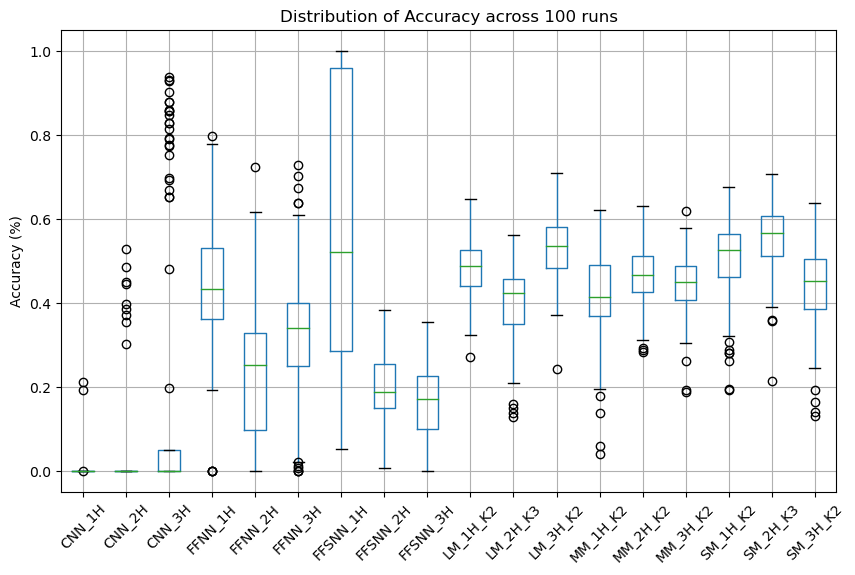


Dataset: Variant I


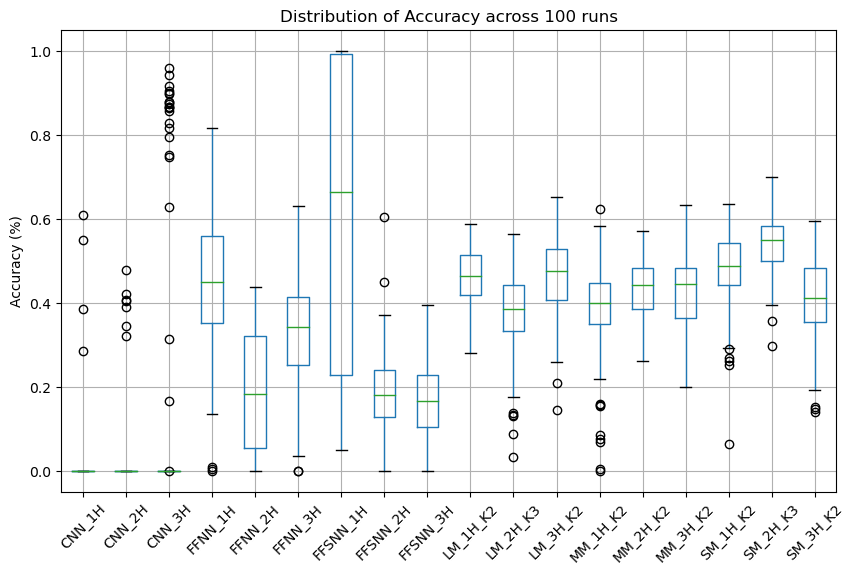


Dataset: Variant II


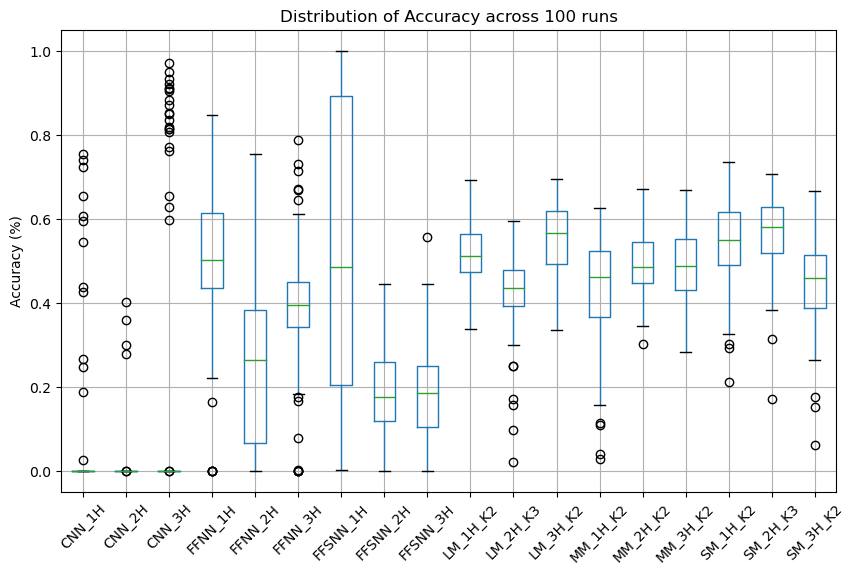


Dataset: Variant III


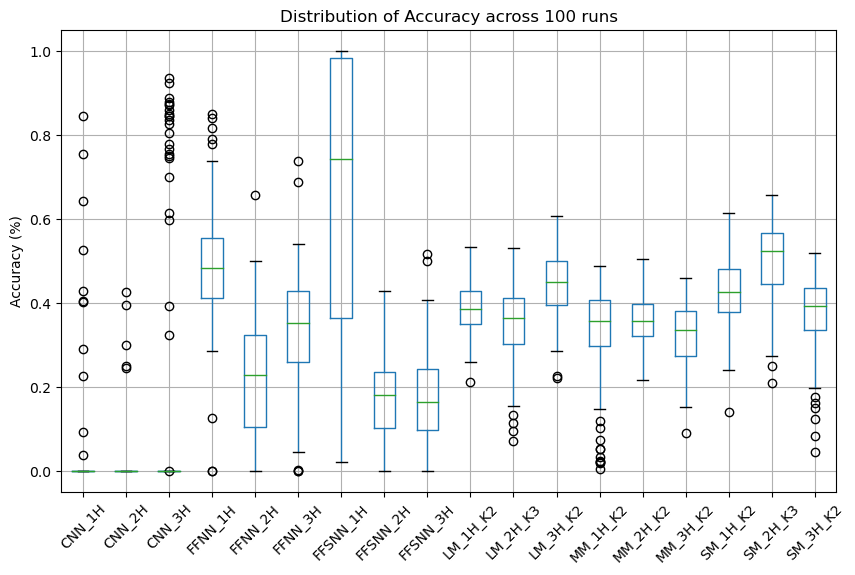


Dataset: Variant IV


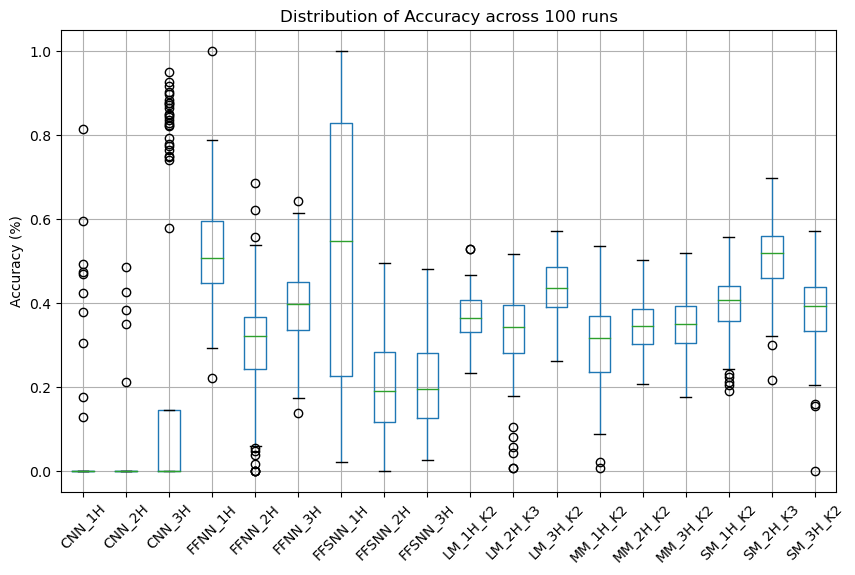


Dataset: Variant V


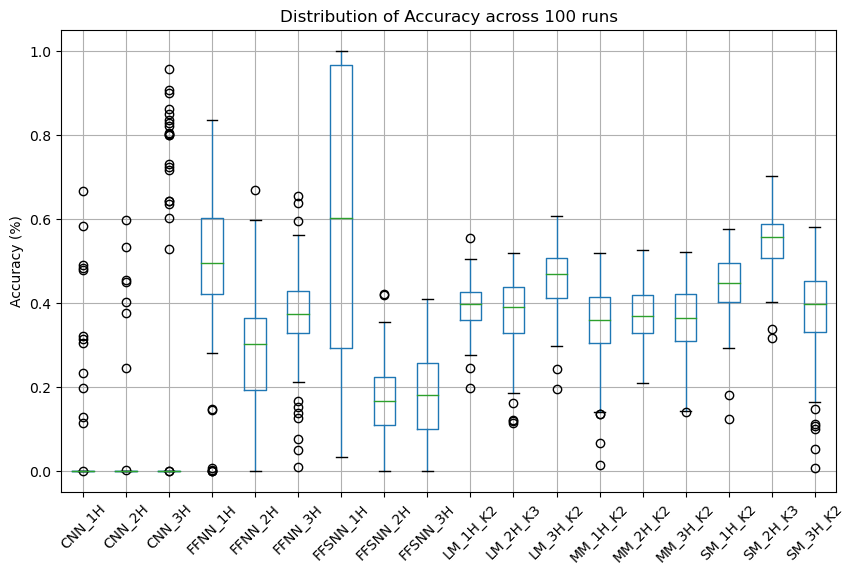

In [5]:
for dataset in df_datasets:
    print(f"\nDataset: {dataset}")
    df = df_datasets[dataset]
    plt.figure(figsize=(10, 6))
    df.boxplot()
    plt.title("Distribution of Accuracy across 100 runs")
    plt.ylabel("Accuracy (%)")
    plt.xticks(rotation=45)
    plt.show()


------------------------------------------------------------
Dataset: Base


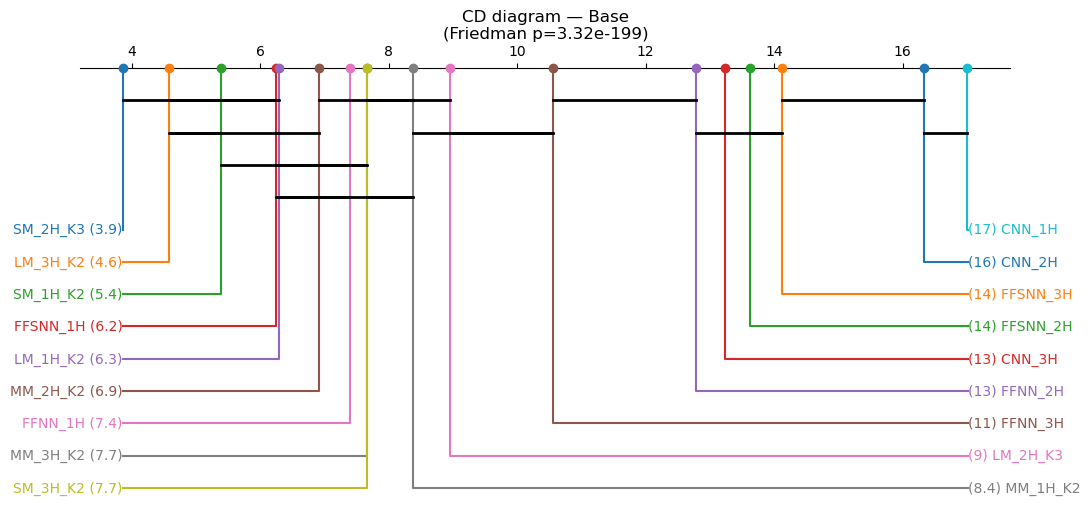


------------------------------------------------------------
Dataset: Variant I


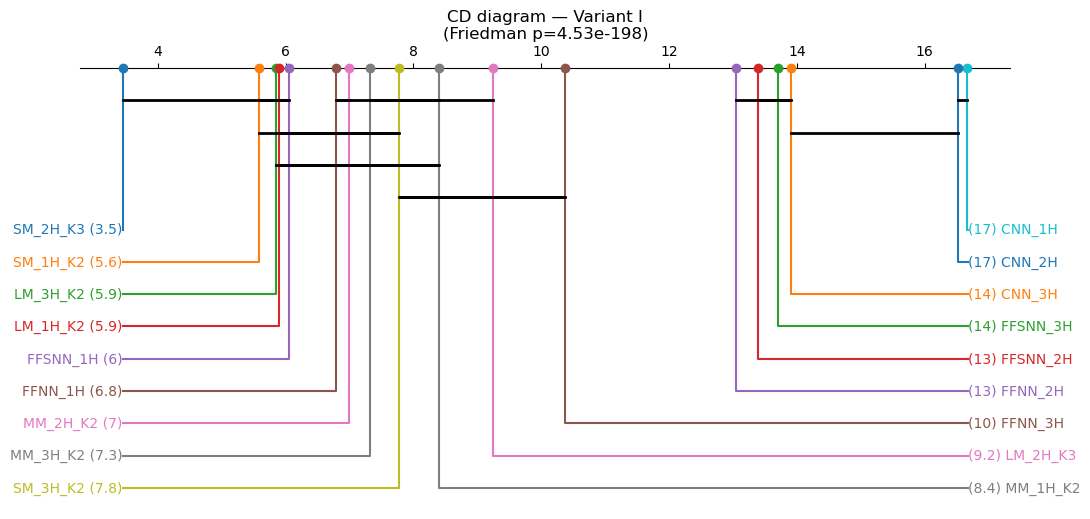


------------------------------------------------------------
Dataset: Variant II


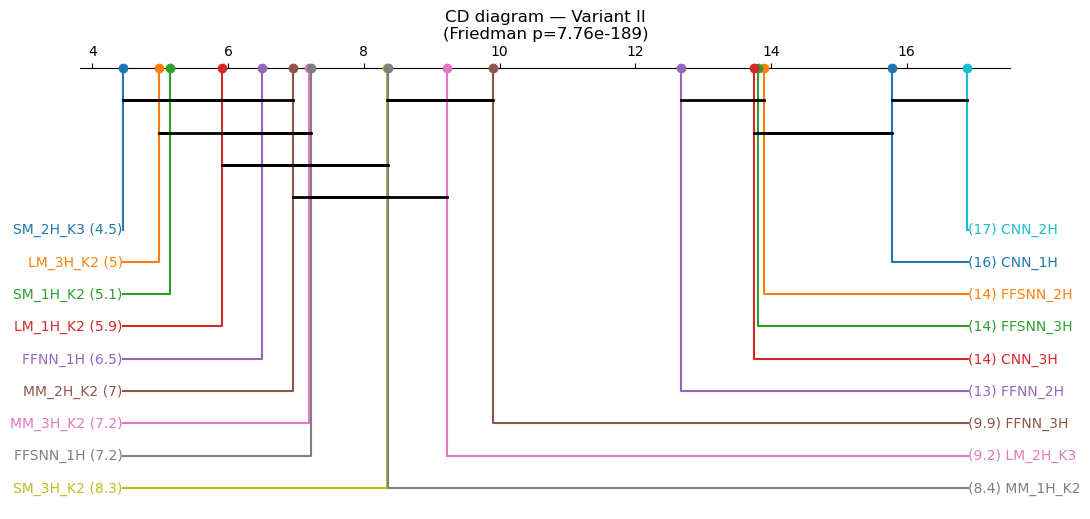


------------------------------------------------------------
Dataset: Variant III


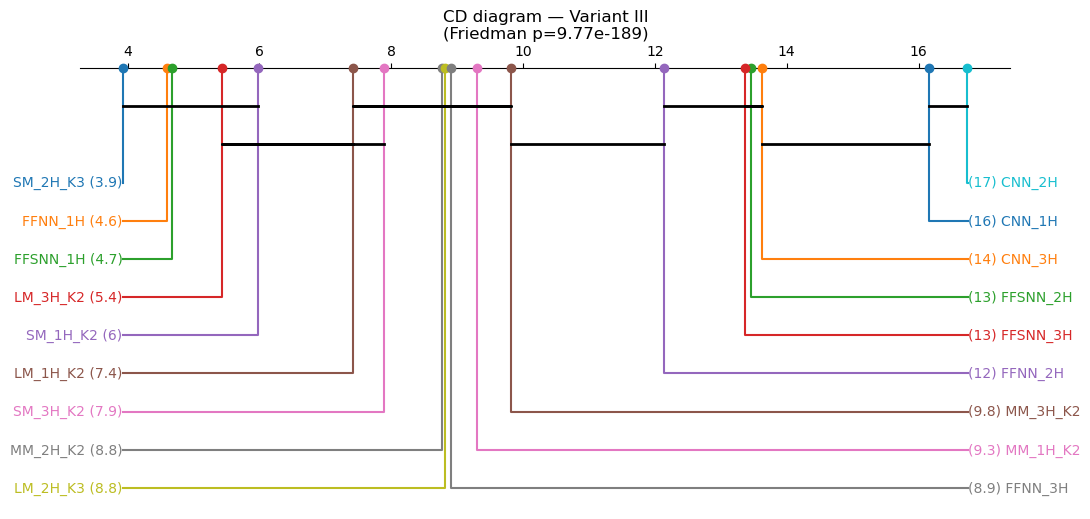


------------------------------------------------------------
Dataset: Variant IV


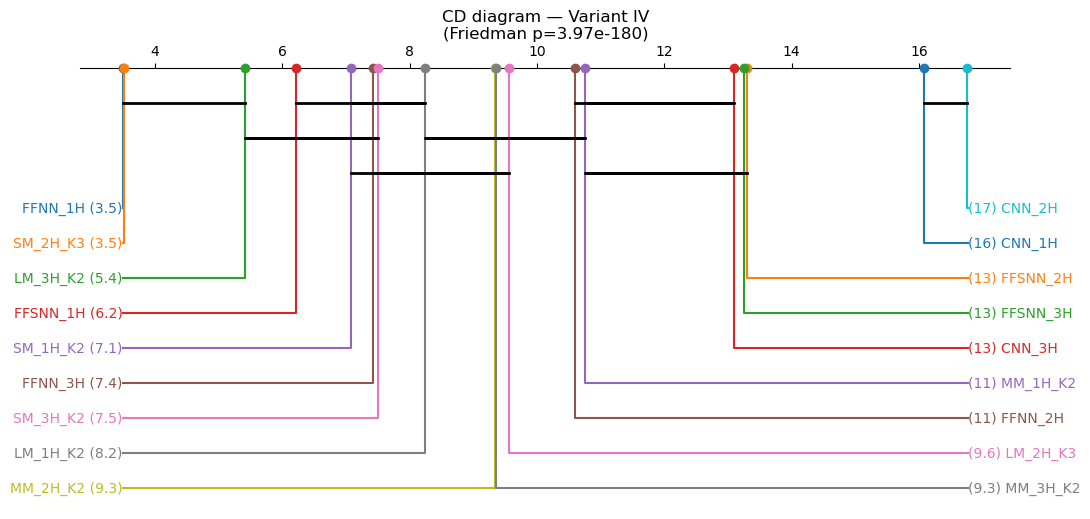


------------------------------------------------------------
Dataset: Variant V


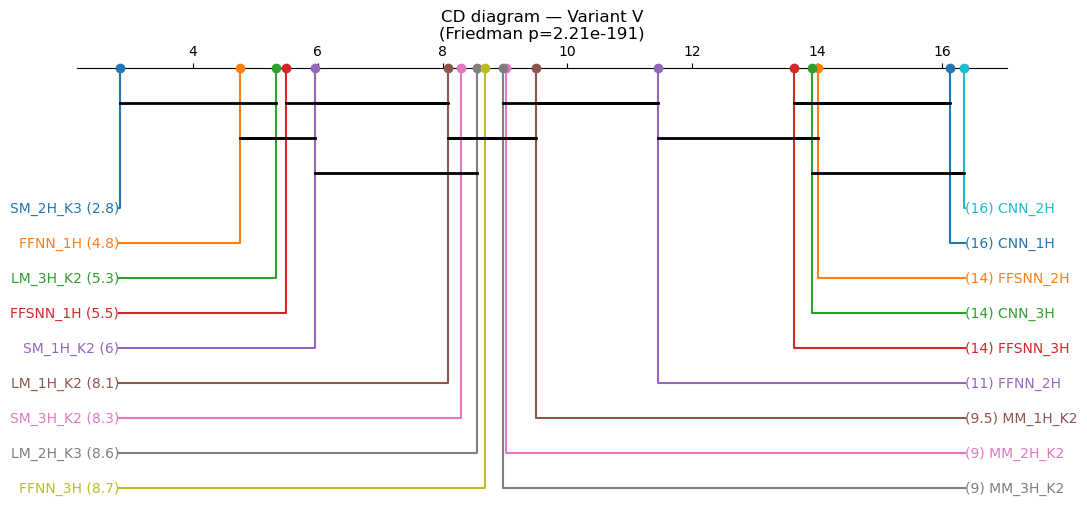

In [6]:
def _align_block_matrix(df):
    """Ensure every column has the same number of observations.
    If counts differ, trim each column to its first `min_count` non-NaN values
    and return a new DataFrame aligned by block (run)."""
    counts = df.notna().sum()
    if counts.min() == 0:
        raise ValueError(f"One or more models have zero non-NaN values: {counts.to_dict()}")
    if counts.nunique() == 1 and counts.iloc[0] == len(df):
        return df.copy()
    min_count = int(counts.min())
    print(f"Warning: unequal run counts per model {counts.to_dict()} -> trimming to {min_count} runs per model")
    return pd.DataFrame({c: df[c].dropna().values[:min_count] for c in df.columns})

def plot_cd_for_each_dataset(df_datasets, save_dir=None, figsize=(12,6)):
    """
    For each dataset in df_datasets (dict name -> DataFrame), compute Friedman + Nemenyi
    and plot a CD diagram.
    - save_dir: if provided, save PNG files there instead of showing interactively.
    """
    if save_dir:
        os.makedirs(save_dir, exist_ok=True)

    for name, df in df_datasets.items():
        print("\n" + ("-"*60))
        print(f"Dataset: {name}")
        if not isinstance(df, pd.DataFrame):
            raise ValueError(f"df_datasets['{name}'] must be a pandas DataFrame")

        df = df.copy()
        df.columns = df.columns.astype(str)
        if df.shape[1] < 2:
            #print(f"Skipping {name}: need >=2 models (found {df.shape[1]})")
            continue

        df_aligned = _align_block_matrix(df)

        try:
            stat, p_value = friedmanchisquare(*[df_aligned[col].values for col in df_aligned.columns])
            #print(f"Friedman chi-square p-value = {p_value:.4g}")
        except Exception as e:
            #print(f"Friedman test failed: {e}. Will continue to compute ranks and Nemenyi anyway.")
            p_value = np.nan

        ranks_per_run = df_aligned.rank(axis=1, ascending=False, method='average')
        avg_ranks = ranks_per_run.mean(axis=0)   
        #print("Average ranks (lower = better):")
        #print(avg_ranks.sort_values().round(4))

        nemenyi = sp.posthoc_nemenyi_friedman(df_aligned.values)
        nemenyi.index = df_aligned.columns
        nemenyi.columns = df_aligned.columns
        #print("Nemenyi pairwise p-values (rows/cols = models):")
        #print(nemenyi.round(4))

        plt.figure(figsize=figsize)
        plt.title(f"CD diagram — {name}\n(Friedman p={p_value:.3g})")
        sp.critical_difference_diagram(avg_ranks, nemenyi)

        if save_dir:
            out = os.path.join(save_dir, f"cd_{name.replace(' ', '_')}.pdf")
            plt.savefig(out, format="pdf", dpi=300, bbox_inches='tight', pad_inches=0.1)
            plt.close()
            #print(f"Saved CD diagram to {out}")
        else:
            plt.show()

plot_cd_for_each_dataset(df_datasets)